Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv("/content/Supercharge Locations.csv")
df.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date,Unnamed: 11
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013,NaN
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013,NaN
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012,NaN
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014,NaN
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014,NaN


In [6]:
df.info()
df.describe(include='all')
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Supercharger    5876 non-null   object 
 1   Street Address  5876 non-null   object 
 2   City            5876 non-null   object 
 3   State           5754 non-null   object 
 4   Zip             3947 non-null   object 
 5   Country         5876 non-null   object 
 6   Stalls          5876 non-null   int64  
 7   kW              5870 non-null   float64
 8   GPS             5876 non-null   object 
 9   Elev(m)         5876 non-null   int64  
 10  Open Date       5126 non-null   object 
 11  Unnamed: 11     0 non-null      float64
dtypes: float64(2), int64(2), object(8)
memory usage: 551.0+ KB


np.int64(0)

**Dropping duplicate values**

In [7]:
df.drop_duplicates(inplace=True)

**Checking null values**

In [8]:
# Check % missing
(df.isnull().mean() * 100).sort_values(ascending=False)

# Fill or drop based on domain logic
df['kW'].fillna(df['kW'].median(), inplace=True)
df.dropna(subset=['GPS'], inplace=True)

/tmp/ipython-input-8-2971712899.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kW'].fillna(df['kW'].median(), inplace=True)


**Converting Data Types**

In [9]:
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')
df['Zip'] = df['Zip'].astype(str)

**Feature Engineering – Split GPS**

In [10]:
df[['Latitude', 'Longitude']] = df['GPS'].str.split(',', expand=True).astype(float)
df['Year'] = df['Open Date'].dt.year

***Exploratory Data Analysis (EDA)***

In [11]:
df.describe(include='all')
df['Country'].value_counts().head(10)
df['Stalls'].value_counts().head(10)

,count
Stalls,
8,1552
6,1143
12,858
3,460
4,400
16,330
10,267
20,214
9,153


**Correlation Analysis**

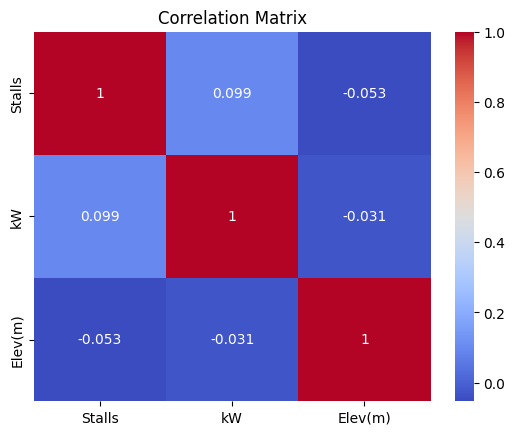

In [12]:
numeric_cols = ['Stalls', 'kW', 'Elev(m)']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

***Visualizations***

**Stations Over Time**

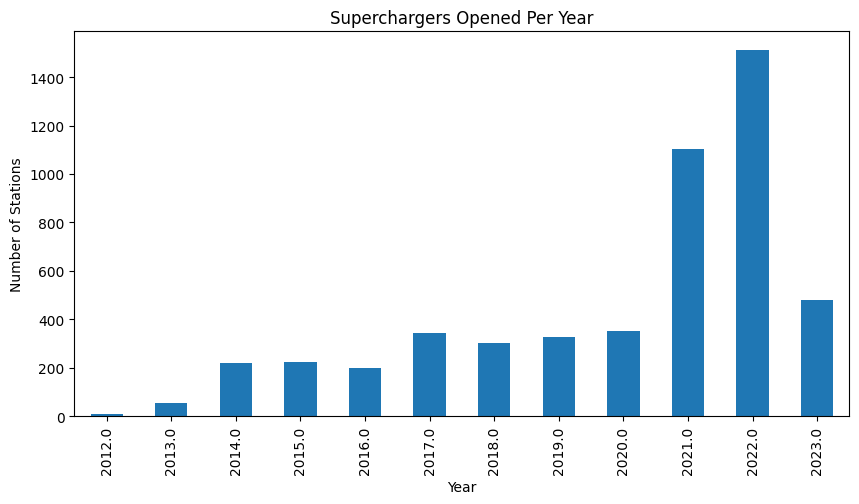

In [13]:
stations_per_year = df.groupby('Year').size()
stations_per_year.plot(kind='bar', figsize=(10, 5), title='Superchargers Opened Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.show()

**Stations by Country (Top 10)**

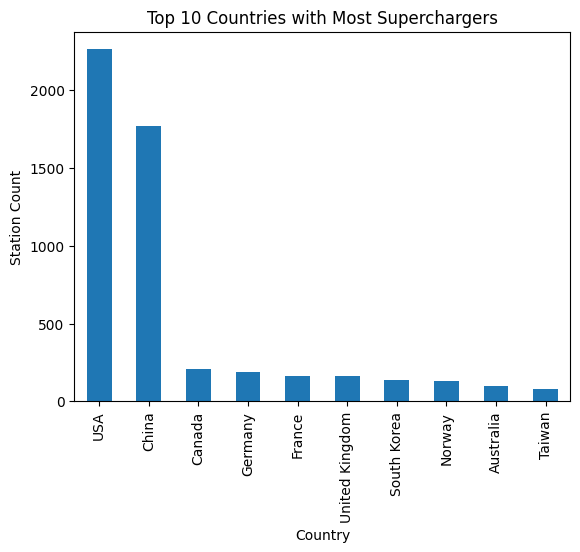

In [14]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top 10 Countries with Most Superchargers')
plt.ylabel('Station Count')
plt.show()

**Charging Capacity Distribution**

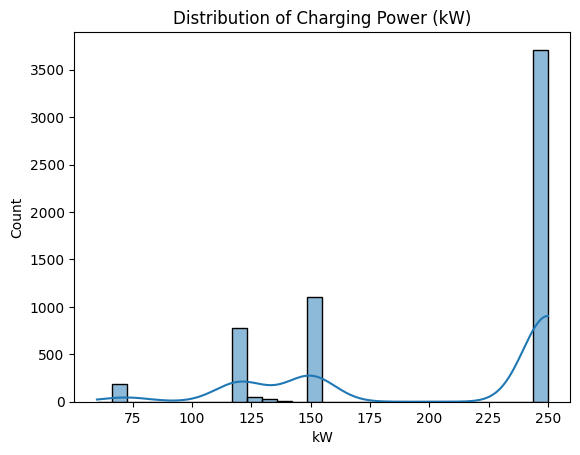

In [15]:
sns.histplot(df['kW'], bins=30, kde=True)
plt.title('Distribution of Charging Power (kW)')
plt.show()

**Stalls Distribution**

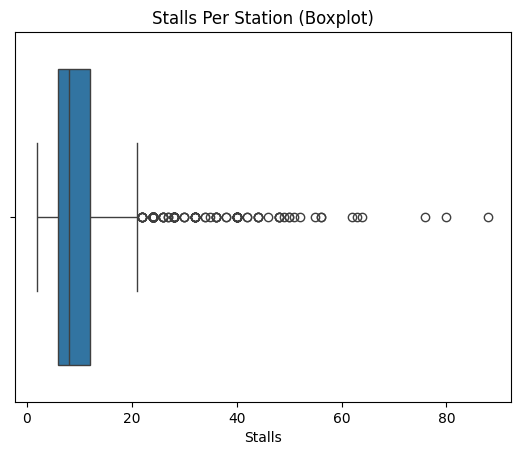

In [16]:
sns.boxplot(x=df['Stalls'])
plt.title('Stalls Per Station (Boxplot)')
plt.show()

**Elevation vs Charging Power**

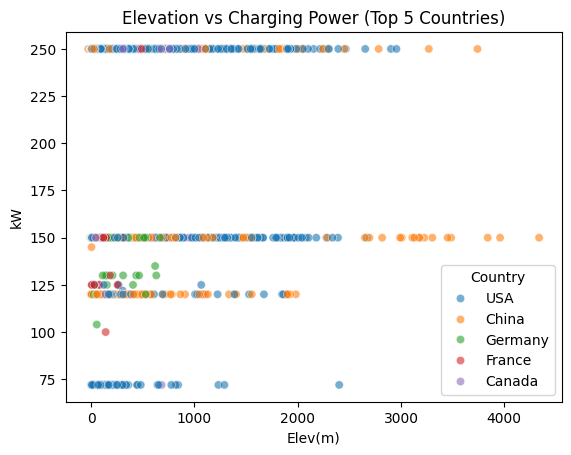

In [24]:
# Select top 5 countries
top_countries = df['Country'].value_counts().head(5).index
df_top = df[df['Country'].isin(top_countries)]

# Plot only top countries
sns.scatterplot(x='Elev(m)', y='kW', data=df_top, hue='Country', alpha=0.6)
plt.title('Elevation vs Charging Power (Top 5 Countries)')
plt.show()

**Check if there fewer stations at higher elevations?**


In [26]:
df[df['Elev(m)'] > 1000].shape[0] / df.shape[0]

0.05701157249829816

**Check if newer stations offer higher kW ratings**

<Axes: xlabel='Year', ylabel='kW'>

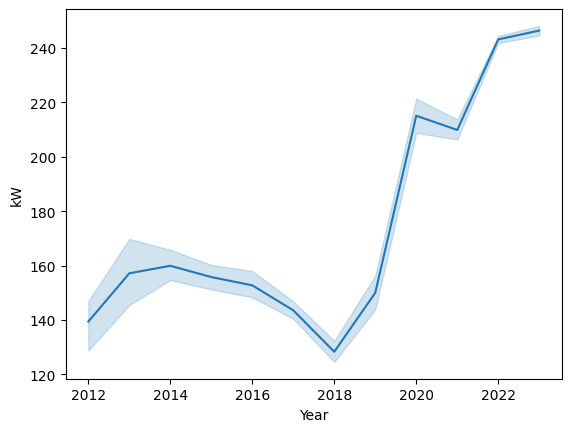

In [25]:
sns.lineplot(data=df, x='Year', y='kW')

**Check if high-power stations have more stalls?**

<Axes: xlabel='kW', ylabel='Stalls'>

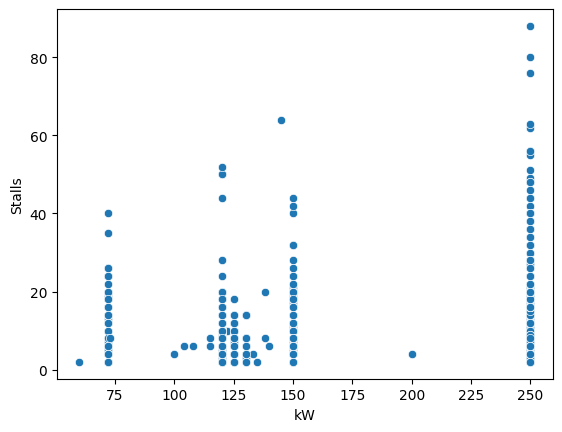

In [28]:
sns.scatterplot(x='kW', y='Stalls', data=df)

***Key Findings Summary ***


*   Supercharger Power Output Has Increased Over Time
*   U.S., China, and Germany Lead in Deployment
*   Only ~5.7% of Stations Exist at High Elevations (>1000m)
*   High-Power Stations Tend to Have More Stalls
*   Supercharger Growth Accelerated Post-2015






